In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("Iris.csv")
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


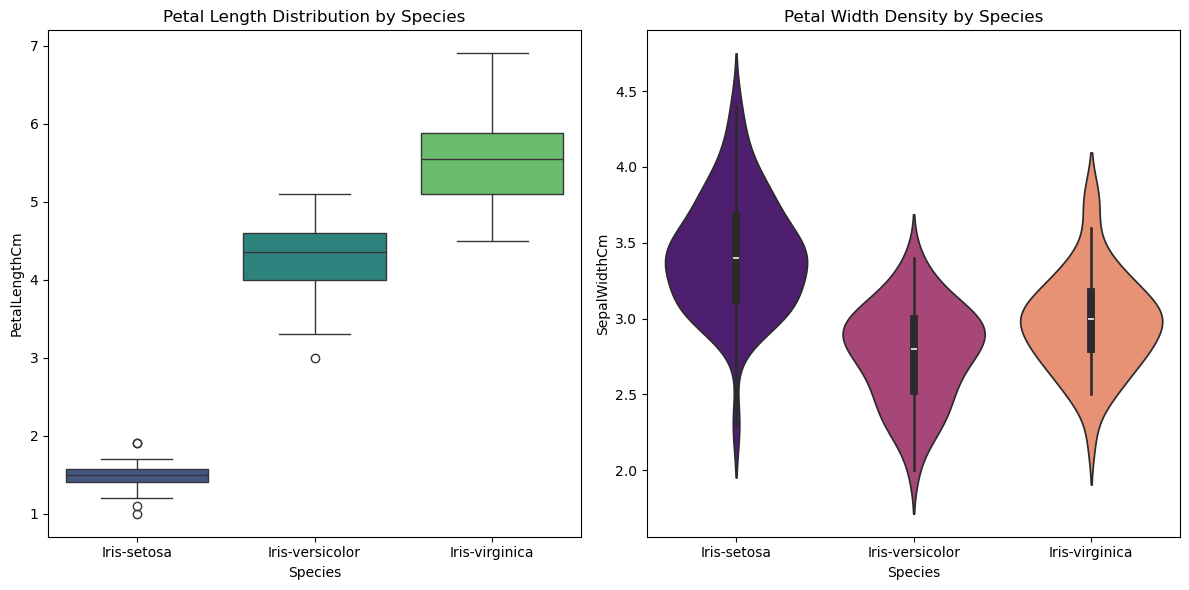

In [3]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Species', y='PetalLengthCm', data=df, hue='Species', palette='viridis', legend=False)
plt.title('Petal Length Distribution by Species')

plt.subplot(1, 2, 2)
sns.violinplot(x='Species', y='SepalWidthCm', data=df, hue='Species', palette='magma', legend=False)
plt.title('Petal Width Density by Species')

plt.tight_layout()
plt.show()

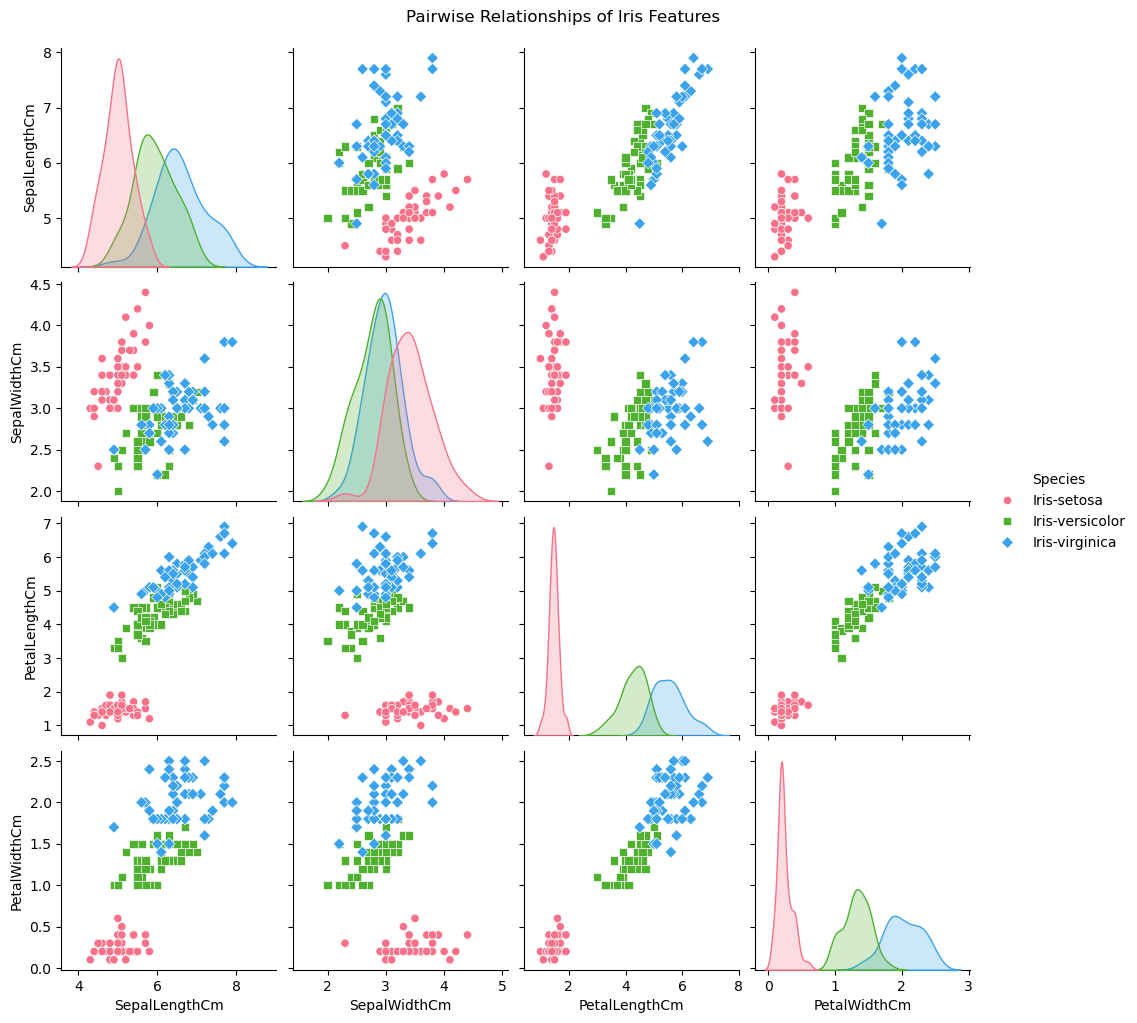

In [4]:
sns.pairplot(df, hue='Species', palette='husl', markers=["o", "s", "D"])
plt.suptitle("Pairwise Relationships of Iris Features", y=1.02)
plt.show()

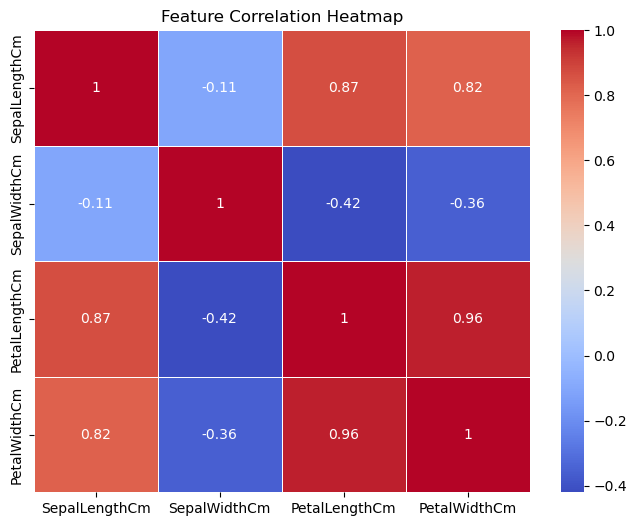

In [5]:
plt.figure(figsize=(8, 6))

correlation_matrix = df.drop('Species', axis=1).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [6]:
summary = df.groupby('Species').mean()
print(summary)

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


In [7]:
fig = px.scatter_3d(
    df, 
    x='SepalLengthCm',
    y='PetalLengthCm',
    z='PetalWidthCm',
    color='Species',
    symbol='Species',
    size='SepalWidthCm',
    size_max=15,
    opacity=0.7,
    title='Iris Dataset: 3D Feature Space',
    labels={
        'SepalLengthCm': 'Sepal Length (cm)',
        'PetalLengthCm': 'Sepal Width (cm)',
        'PetalWidthCm': 'Petal Length (cm)'
    }
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

In [8]:
y = df['Species']
X = df.drop('Species', axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [10]:
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')

Accuracy: 1.0
Precision: 1.0


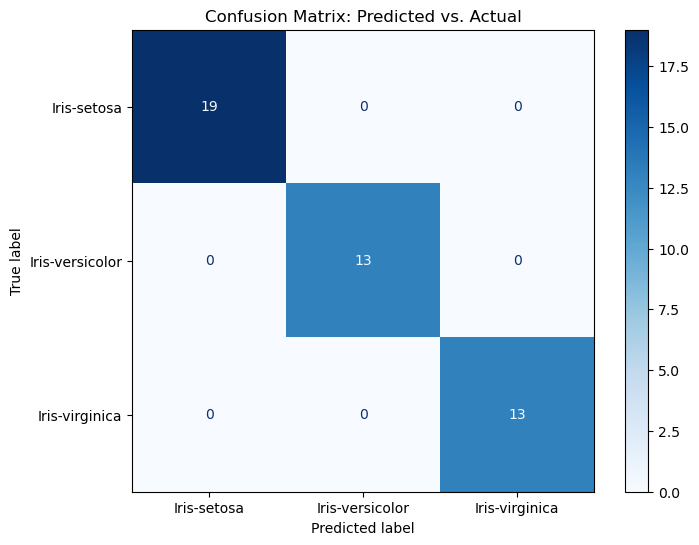

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix: Predicted vs. Actual')
plt.show()